### Convert Light text ###

In [ ]:
light_file = open('../../rgba.txt')

Lines = light_file.readlines()

out = "{"
for line in Lines:
    if line[:9] == "Direction":
        out += "{"
        for i in range(3):
            out += str(-float(line.split()[i+1]))
            if i != 2:
                out += ", "
        out += "},\n"

out+="}"

print("Direction")
print(out)

out = "["
for line in Lines:
    if line[:5] == "Color":
        out += "["
        for i in range(3):
            out += line.split()[i+1]
            if i != 2:
                out += ", "
        out += "],\n"

out+="]"
print("COLOR : ")
print(out)

### ADD IMAGES ###

In [1]:
from PIL import Image, ImageCms
import numpy as np
import cv2
import io

image = Image.open('../Directional/rgba/1.png')
data = np.asarray(image)
# print(np.amax(data))

final = np.zeros_like(data)
# print(final.shape)

color = [[0.375562, 0.247233, 0.363067],
[0.353752, 0.252561, 0.391523],
[0.117, 0.256145, 0.138785],
[0.153705, 0.244055, 0.106607],
]

# print(len(color[0]))

def convert_to_srgb(img):
    '''Convert PIL image to sRGB color space (if possible)'''
    icc = img.info.get('icc_profile', '')
    if icc:
        io_handle = io.BytesIO(icc)     # virtual file
        src_profile = ImageCms.ImageCmsProfile(io_handle)
        dst_profile = ImageCms.createProfile('sRGB')
        img = ImageCms.profileToProfile(img, src_profile, dst_profile)
    return img

def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

for i in range(4):
    name = '../Directional/rgba/' + str(i) + '.png'
    img_tmp = Image.open(name)
    img_tmp = convert_to_srgb(img_tmp)
    img_tmp = np.asarray(img_tmp)
    # img_tmp = adjust_gamma(img_tmp, 2.2)
    for j in range(3):
        tmp = np.zeros_like(final)
        tmp[:,:,j] = img_tmp[:,:,j] * color[i][j]
        final = np.add(final , tmp)

gamme_correct = adjust_gamma(final, 2.4)


im = Image.fromarray(final)
# im.save("../Directional/rgba/final_srgb.png")
im = Image.fromarray(gamme_correct)
# im.save("../Directional/rgba/final_srgb_gc.png")



### Add Background ###

In [ ]:

image2 = Image.open(base_dir + name2)

image1 = convert_to_srgb(image1)
image2 = convert_to_srgb(image2)

image1 = np.asarray(image1)

### Add Background ###

In [88]:
base_dir = "../Directional/street_gamma/"
name1 = "bunny_black.png"
name2 = "final_srgb_gc.png"
image1 = Image.open(base_dir + name1)
image2 = Image.open(base_dir + name2)

image1 = convert_to_srgb(image1)
image2 = convert_to_srgb(image2)

image1 = np.asarray(image1)
image2 = np.asarray(image2)

img = np.add(image1[:,:,:3], image2)

g_img = adjust_gamma(img, 2.2)

im = Image.fromarray(img)
im.save(base_dir + "add.png")
im = Image.fromarray(g_img)
im.save(base_dir + "add_gc.png")

In [90]:
from PIL import Image
import numpy as np
base_dir = "../Directional/street_gamma/"
name1 = "add_fresnel.png"
image1 = Image.open(base_dir + name1)

image1 = np.asarray(image1)

g_img = adjust_gamma(image1, 2.8)

im = Image.fromarray(g_img)
im.save(base_dir + "add_fresnel_gc.png")

### Compare Images ###

In [9]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [10]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB, multichannel=True)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

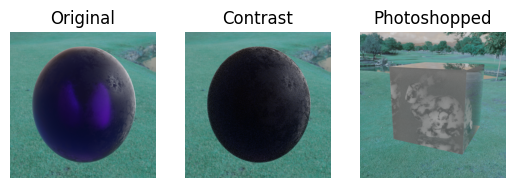

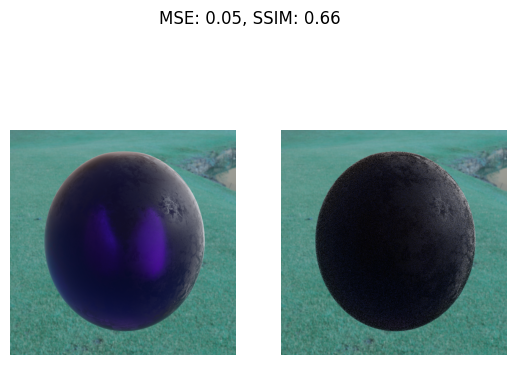

In [23]:

original = cv2.imread("C:/thtg/tg/Renderer/equal_time/grape.png")
contrast = cv2.imread("C:/thtg/tg/Renderer/equal_time/grape_equaltime.png")
shopped = cv2.imread("C:/thtg/tg/Renderer/equal_time/bunny_d.png")

original= original/255
contrast= contrast/255

original = original[:contrast.shape[0], :contrast.shape[1], :contrast.shape[2]]

# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
# compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
# compare_images(original, shopped, "Original vs. Photoshopped")

In [21]:
import numpy as np
from PIL import Image
name1 = "C:/Users/thoms/tg\Renderer/render_OptiX7_final/build/render/nerf_dataset/test/0.png"
image1 = Image.open(name1)
image1 = np.asarray(image1)

print(image1.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/thoms/tg\\Renderer/render_OptiX7_final/build/render/nerf_dataset/test/0.png'

In [28]:
original = cv2.imread("C:/thtg/tg/Renderer/equal_time/dragon.png")
contrast = cv2.imread("C:/thtg/tg/Renderer/equal_time/dragon_equaltime.png")

original= original/255
contrast= contrast/255

mse(original, contrast)

0.026915559336820268